# Transformers by Experiment




In [ ]:
# !pip install transformers accelerate sentencepiece datasets seaborn --quiet

In [37]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [38]:
model_id = 'gpt2'
tok = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, output_attentions=True).to(device)

In [39]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

## Talk to the model

In [54]:
generator = pipeline('text-generation', model='gpt2')
g = generator("Please answer the following question: What does two plus two equal?", 
              max_length=5, num_return_sequences=1)
print(g[0]["generated_text"])

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=5) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Please answer the following question: What does two plus two equal? in the following way:

1.

2.

3.

4.

5.

6.

7.

8.

9.

10.

11.

12.

13.

14.

15.

16.

17.

18.

19.

20.

21.

22.

23.

24.

25.

26.

27.

28.

29.

30.

31.

32.

33.

34.

35.

36.

37.

38.

39.

40.

41.

42.

43.

44.

45.

46.

47.

48.

49.

50.

51.

52.

53.

54.

55.

56.

57.

58.

59.

60.

61.

62.

63


In [6]:
generator("Please answer the following question: What does two plus two equal?", 
          max_length=30, num_return_sequences=1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Please answer the following question: What does two plus two equal?\n\nWhat does a number equal in a world?\n\nWhat is the meaning of the word "big?"\n\nWhat is the meaning of the word "big" in a different language?\n\nWhat is the meaning of the word "big" in a different country?\n\nWhat is the meaning of the word "big" in a different language?\n\nYou should ask yourself: Why should we care about something we don\'t really care about? We wouldn\'t want to kill you. We\'d just as soon die. We would just as soon die. Now. We\'ve given up doing something we\'ve never done before. We\'re just like the rest of us. We\'re not making any money. We don\'t have any money. We\'re just being stupid. We\'re just like the rest of us. We\'ve taken it for granted that if you\'re smart, you\'ll always come up with clever things. We don\'t have any money. We don\'t have any money. We\'re just making stupid mistakes. We just make stupid mistakes. We just make stupid mistakes. We jus

## What does this actually do?

In [58]:
def complete(prompt: str, max_new=5, top_k=20):
    input = tok(prompt, return_tensors="pt").to(device)
    return input

complete("stats 507 lecture is too early in the morning")

{'input_ids': tensor([[34242,  2026,    22, 19143,   318,  1165,  1903,   287,   262,  3329]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [61]:
tok.tokenize("stats 507 lecture is too early in the morning!!!!!! <tok> ")

['stats',
 'Ġ50',
 '7',
 'Ġlecture',
 'Ġis',
 'Ġtoo',
 'Ġearly',
 'Ġin',
 'Ġthe',
 'Ġmorning',
 '!!!!',
 '!!']

In [8]:
complete('Students at the university of Michigan are')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Students at the university of Michigan are required to pay for their education with the help of a fee.

The bill would also require all students to pay a "fee of $50 or more," which would be the fee that the


In [9]:
complete('Two times two equals')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Two times two equals two times five

The next time three equals three times five

The next time four equals four times five

The next time three equals four times five

The next time two equals


# GPT-2 Architecture Overview

In [10]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

### Embeddings
- `wte`: token embedding matrix (vocab size 50,257 → 768-dim vectors)
- `wpe`: positional embedding matrix (positions 0–1023 → 768-dim vectors)

Every input token is converted to:

`embedding = wte[token_id] + wpe[position]`

### Transformer Blocks (12 total)

    def forward(self, x):
        # 1. Compute Q, K, V in one linear projection
        # c_attn is a Conv1D = linear layer with weights [hidden_size, 3*hidden_size]
        qkv = self.c_attn(x)    # shape: (batch, seq_len, 3*hidden_size)

        # 2. Split into Q, K, V
        query, key, value = qkv.split(self.split_size, dim=2)
        # each shape: (batch, seq_len, hidden_size)

        # 3. Reshape into multi-head form
        # n_head * head_dim = hidden_size
        query = query.view(batch, seq_len, self.n_head, self.head_dim).transpose(1, 2)
        key   = key.view(batch, seq_len, self.n_head, self.head_dim).transpose(1, 2)
        value = value.view(batch, seq_len, self.n_head, self.head_dim).transpose(1, 2)
        # now: (batch, n_head, seq_len, head_dim)

        # 4. Dot-product attention scores
        attn_scores = torch.matmul(query, key.transpose(-1, -2))
        # yields (batch, n_head, seq_len, seq_len)

        # 5. Scale by sqrt(head_dim)
        attn_scores = attn_scores / math.sqrt(self.head_dim)

        # 6. Apply causal mask (upper-triangular -∞)
        attn_scores = attn_scores + self.bias[:, :, :seq_len, :seq_len]

        # 7. Softmax to turn scores into attention weights
        attn_weights = F.softmax(attn_scores, dim=-1)
        attn_weights = self.attn_dropout(attn_weights)

        # 8. Weighted sum of values
        attn_output = torch.matmul(attn_weights, value)
        # shape: (batch, n_head, seq_len, head_dim)

        # 9. Concatenate heads
        attn_output = attn_output.transpose(1, 2).contiguous()
        attn_output = attn_output.view(batch, seq_len, hidden_size)

        # 10. Final linear projection
        attn_output = self.resid_dropout(self.c_proj(attn_output))


#### Self-Attention
- c_attn: Conv1D(nf=2304, nx=768) This is just a linear layer implemented as a “Conv1D”:
  projects the 768-dim input into Q ∥ K ∥ V (3×768 = 2304).
- `c_proj`: projects attention output back to 768-dim
- multi-head attention is created by slicing these projections

#### Feed-Forward Network (MLP)
- `c_fc`: expands 768 → 3072
- GELU nonlinearity
- `c_proj`: projects 3072 → 768

Both sublayers have:
- a LayerNorm before them (`ln_1`, `ln_2`)
- residual connections around them

Stacking 12 of these blocks gives the model its depth.


### 3. **Output Layer**
- `lm_head`: a linear map from hidden size (768) back to vocab size (50,257)
- tied weights with the embedding matrix (`wte`), meaning it reuses the same learned token vectors for output scoring


## Notes
- The model is entirely a stack of identical blocks.
- Each block performs two operations: self-attention and a feed-forward network.
- Embeddings and the output head tie the model to the vocabulary.

## The positional embeddings


In [19]:
pos_embed = model.transformer.wpe.weight.detach().cpu().numpy()
pos_embed.shape

(1024, 768)

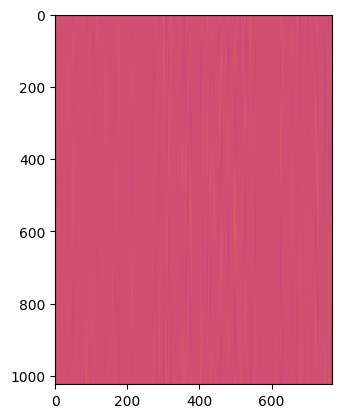

In [20]:
import matplotlib.pyplot as plt
plt.imshow(pos_embed, cmap="plasma")

## Token embeddings

In [64]:
s = "basketball"
tok.tokenize(s)

['basketball']

In [72]:
tok_emb = model.transformer.wte.weight.detach().cpu() 
tid = tok.encode("basketball")
#  tok_emb[tid]


tensor([[ 1.5313e-01,  1.2014e-01,  3.3417e-01,  5.5633e-02,  2.2345e-02,
         -1.5358e-01, -3.1938e-01, -4.4024e-02, -4.7200e-02,  4.9048e-02,
          2.4341e-01,  2.9823e-01,  6.1253e-02,  1.8238e-01, -2.4062e-02,
         -1.5340e-01, -7.3233e-02, -3.6582e-02, -5.6408e-02,  1.0857e-01,
         -9.8510e-02,  5.7209e-02,  1.0739e-01,  1.9504e-01,  1.6398e-01,
          1.8818e-01, -2.8335e-02, -9.3258e-02, -1.0923e-02,  1.7536e-01,
         -4.0884e-02,  2.4656e-02,  5.9901e-02, -1.3308e-01, -3.1968e-02,
          3.2188e-01, -3.1941e-01,  6.8215e-03,  1.0748e-01, -1.8824e-01,
         -8.6086e-02,  6.2116e-02,  8.2841e-02,  2.9976e-03,  6.5630e-02,
         -5.3018e-02,  3.3719e-02,  8.6534e-02,  7.6456e-02, -6.0278e-02,
         -3.3732e-02, -1.5601e-01, -7.4954e-02,  7.7753e-02,  2.8112e-02,
         -3.1364e-01, -4.1132e-03, -7.5249e-03,  1.6381e-02,  6.1345e-02,
          8.6555e-02,  1.8978e-01, -2.6339e-01, -5.9161e-03,  5.4446e-01,
          3.7486e-02,  6.9129e-02, -1.

In [75]:
import torch

def vec(word):
    """Return embedding vector for a word (handling GPT2 space issue)."""
    tid = tok.encode(" " + word)[0]  # GPT-2 uses "Ġword" convention
    return tok_emb[tid] 

# vec(" tennis"), vec(" basketball")

## Cosine similarity

Cosine similarity will tend to be higher for words that are related.

In [77]:
def cos(a, b):
    return torch.cosine_similarity(a.unsqueeze(0), b.unsqueeze(0)).item()

In [78]:
cos(vec("cat"), vec("dog"))

0.5497899055480957

In [79]:
cos(vec("cat"), vec("pizza"))

0.3011191189289093

In [80]:
cos(vec("river"), vec("stream"))

0.4608811140060425

In [86]:
cos(vec("donkey"), vec("person"))

0.2585083246231079

## Nearest neighbors in embedding space

In [103]:
#
def nearest_neighbors(word, k=10):
    v = vec(word)
    sim = torch.cosine_similarity(tok_emb, v)
    topk = torch.topk(sim, k+1).indices
    decoded = [tok.decode([i]) for i in topk[1:].tolist()]
    return decoded

nearest_neighbors("hamburger")

[' burgers',
 ' burger',
 ' Hamb',
 ' Burger',
 ' steak',
 ' pizza',
 ' sandwiches',
 ' sushi',
 ' tacos',
 ' bacon']

## Analogies
The [word2vec paper](https://arxiv.org/abs/1301.3781) famously showed that, in the embedding space,

    king - man + woman ~= queen

In [111]:
def analogy(a, b, c, k=5):
    v = vec(a) - vec(b) + vec(c)
    sim = torch.cosine_similarity(tok_emb, v)
    topk = torch.topk(sim, k).indices
    decoded = [tok.decode([i]) for i in topk.tolist()]
    return decoded

In [112]:
analogy("king", "man", "woman")

[' king', ' queen', ' princess', ' Queen', ' kings']

In [113]:
analogy("dog", "adult", "child")

[' dog', ' child', ' dogs', ' Dog', ' puppy']

In [116]:
analogy("carrots", "orange", "blue")

[' carrots', ' carrot', ' blue', ' broccoli', ' cabbage']

In [118]:
analogy("zebra", "horse", "sweater")

[' sweater', ' z', ' scarf', ' Z', ' zipper']

## Pluralization
Similarly, the "direction" from a word to its plural is roughly consistent:

In [121]:
pairs = [
    ("cat", "cats"),
    ("dog", "dogs"),
    ("car", "cars"),
    ("tree", "trees"),
    ("matrix", "matrices")
]

dirs = [vec(p2) - vec(p1) for p1, p2 in pairs]
dirs = torch.stack(dirs)

plural = dirs.mean(dim=0)   # show first 10 dims of average plural direction

In [123]:
for i, (p1, p2) in enumerate(pairs):
    print(p1, "→", p2, cos(dirs[i], plural))

cat → cats 0.6923072338104248
dog → dogs 0.7354322671890259
car → cars 0.6982565522193909
tree → trees 0.6522361636161804
matrix → matrices 0.42150527238845825


Other relations can encode similarly:

In [126]:
gender_dir = vec("woman") - vec("man")
gender_dir /= gender_dir.norm()

In [127]:
words = ["king","queen",
         "man","woman",
         "doctor","nurse",
         "teacher","mother","father"]

for w in words:
    proj = torch.dot(vec(w), gender_dir).item()
    print(f"{w:10s} {proj: .3f}")

king       -0.229
queen       1.022
man        -1.140
woman       1.502
doctor      0.395
nurse       1.010
teacher     0.540
mother      0.780
father     -0.108


## Clustering in the latent space

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools as it

words = ["dog", "cat", "car", "truck", 
         "man", "woman", "king", "queen",
        "horse", "zebra", 
         "whale", "dolphin"
        ]

X = torch.stack([vec(w) for w in words]).numpy()

p = PCA(n_components=2).fit_transform(X)
p.shape

# complete in lecture

(12, 2)

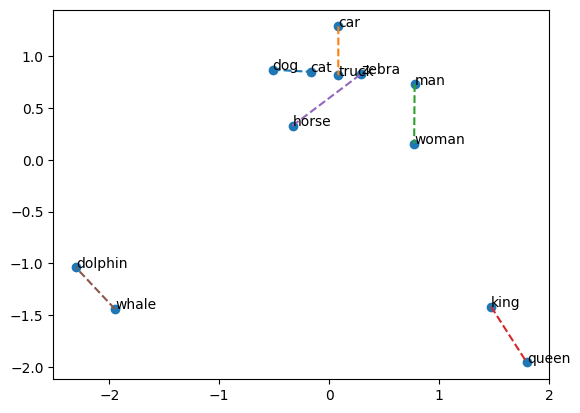

In [139]:
import matplotlib.pyplot as plt
plt.scatter(*p.T)
for (x, y), w in zip(p, words):
    plt.text(x, y, w)
    
for (x1, y1), (x2, y2) in zip(p[::2], p[1::2]):
    plt.plot([x1, x2], [y1, y2], linestyle="--")

## Understanding attention

In [140]:
def run(prompt):
    x = tok(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        out = model(**x)
    return x, out

In [147]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [183]:
prompt="The cat that the dog did not chase ran away."

x, out = run(prompt)
tokens = tok.tokenize(prompt)

<Axes: >

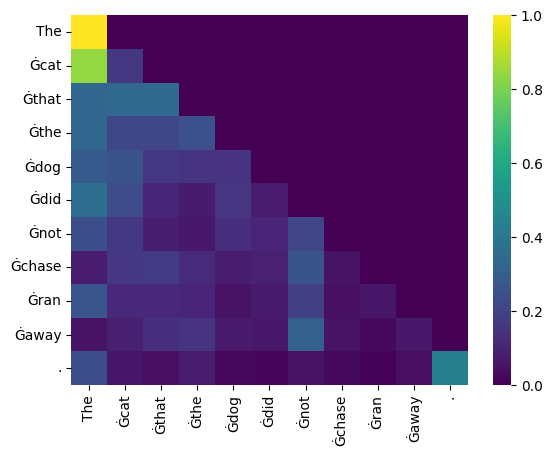

In [184]:
sns.heatmap(
    out.attentions[11][0, 0].detach().cpu().numpy(),
    xticklabels=tokens,
    yticklabels=tokens,
    cmap="viridis"
)

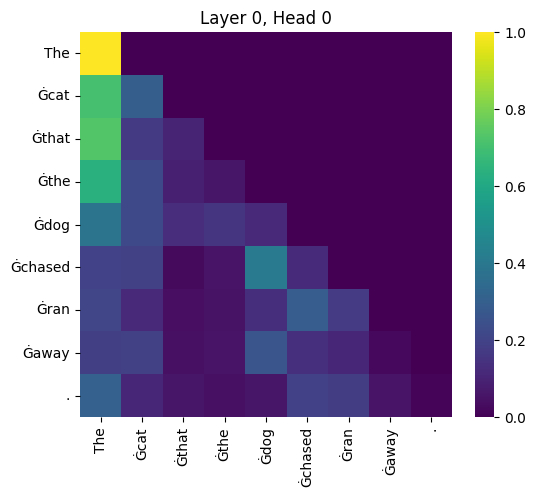

In [12]:
x, out = run(prompt)

layer = 0
head = 0

A = out.attentions[layer][0, head].detach().cpu().numpy()
tokens = tok.convert_ids_to_tokens(x["input_ids"][0])

plt.figure(figsize=(6,5))
sns.heatmap(A, xticklabels=tokens, yticklabels=tokens,
            cmap="viridis")
plt.title(f"Layer {layer}, Head {head}")
plt.show()

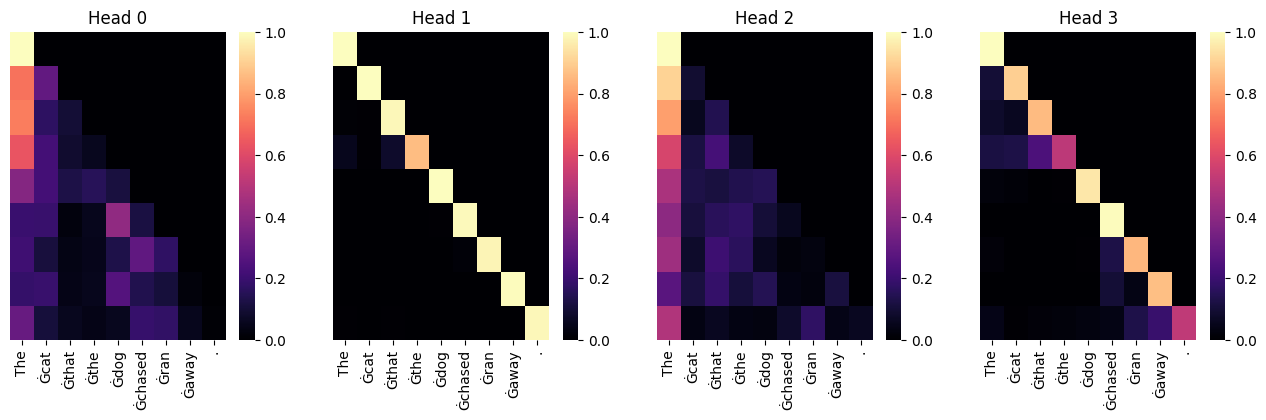

In [182]:
layer = 0
fig, axes = plt.subplots(1, 4, figsize=(16,4))

for head in range(4):
    A = out.attentions[layer][0, head].detach().cpu().numpy()
    sns.heatmap(A, xticklabels=tokens, yticklabels=[],
                cmap="magma", ax=axes[head])
    axes[head].set_title(f"Head {head}")

plt.show()

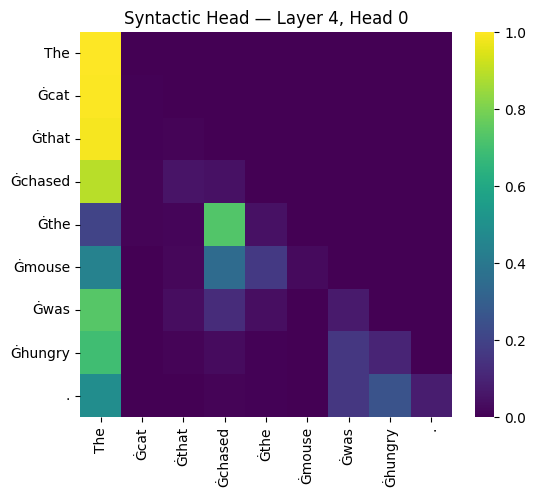

In [14]:
prompt = "The cat that chased the mouse was hungry."
x, out = run(prompt)
tokens = tok.convert_ids_to_tokens(x["input_ids"][0])

layer = 4
head = 0

A = out.attentions[layer][0, head].detach().cpu().numpy()

plt.figure(figsize=(6,5))
sns.heatmap(A, xticklabels=tokens, yticklabels=tokens,
            cmap="viridis")
plt.title(f"Syntactic Head — Layer {layer}, Head {head}")
plt.show()

## Long-range dependencies

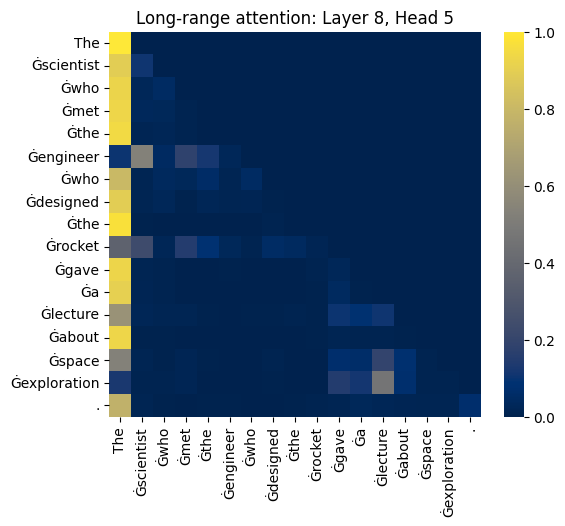

In [187]:
prompt = (
    "The scientist who met the engineer who designed the rocket "
    "gave a lecture about space exploration."
)
x, out = run(prompt)

tokens = tok.convert_ids_to_tokens(x["input_ids"][0])
A = out.attentions[10][0,5].detach().cpu().numpy()  # arbitrary deeper head

plt.figure(figsize=(6,5))
sns.heatmap(A, xticklabels=tokens, yticklabels=tokens,
            cmap="cividis")
plt.title("Long-range attention: Layer 8, Head 5")
plt.show()

## Visualizing  the distribution over next tokens

In [188]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [220]:
prompt = "The cat sat on the"
tok.tokenize(prompt)


['The', 'Ġcat', 'Ġsat', 'Ġon', 'Ġthe']

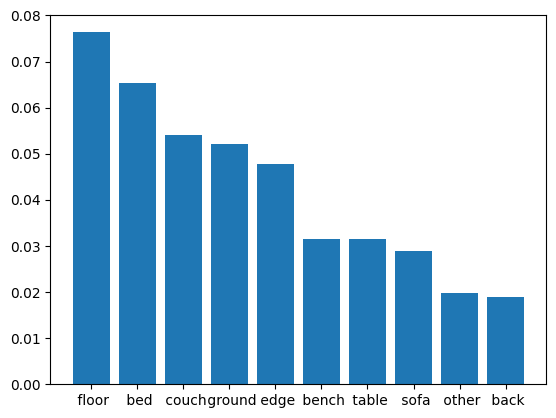

In [221]:

x = tok(prompt, return_tensors="pt").to(device)
with torch.no_grad():
    out = model(**x)

probs = torch.softmax(out.logits[0, -1], 0)
top5 = torch.topk(probs, 10)
words = [tok.decode([i]) for i in top5.indices.tolist()]
weights = probs[top5.indices].cpu().numpy()

# for w, alpha in zip(words, weights):
#     print(f"{w}\t{alpha:.3f}")
    
plt.bar(range(10), weights)
plt.xticks(range(10), words);

 floor        0.0764
 bed          0.0653
 couch        0.0541
 ground       0.0521
 edge         0.0478
 bench        0.0316
 table        0.0315
 sofa         0.0288
 other        0.0199
 back         0.0190
 side         0.0166
 chair        0.0124
 stool        0.0111
 top          0.0108
 grass        0.0097
 seat         0.0087
 wall         0.0082
 desk         0.0075
 cat          0.0070
 front        0.0070


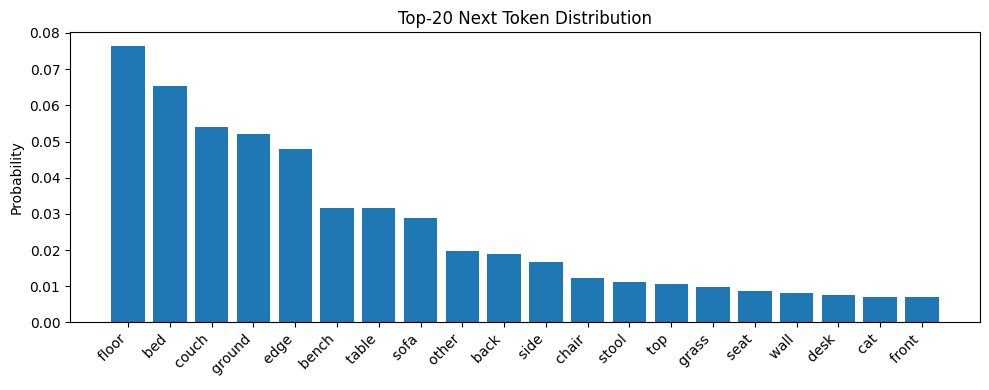

In [17]:
# Example:
show_next_token_distribution("The cat sat on the")